In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.table import Table
import sys
import warnings
warnings.filterwarnings('ignore')
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'
sys.path.append(homedir+'/github/Virgo/programs')
from virgoCommon import *

Running on Rose's computer


# Status of CO/Halpha Targets at the start of INT run

number of CO with Halpha =  214
number of CO without Halpha =  28


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

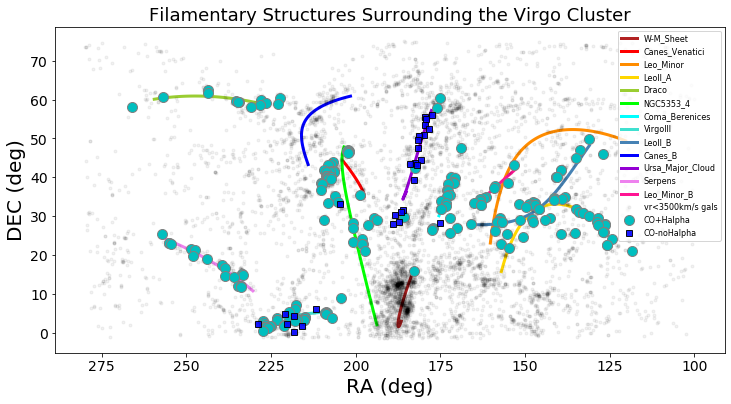

In [3]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=0.05,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)
#
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# update list of targets already observed in halpha

* I am keeping track of all gals in FOV here 
https://docs.google.com/spreadsheets/d/1EEjEdXXxHHq1WnkTQJqADWKfrqN2nF1yA3mYGtc_rbo/edit?usp=sharing

* I download the sheet as csv and write it to ~/github/Virgo/observing/ha-observed-int-may-22A.csv

```
mv ~/Downloads/Bok\ Apr\ 2022\ Observing\ Summary\ -\ all-gals-in-fov-INT-2022May.csv ha-observed-int-may-22A.csv

```


* then remake v2 subtables so that Haobsflag is updated

* Running at the end of 
  * night 1
  * night 2

In [262]:
%run ~/github/Virgo/programs/write_subtables_v2.py --version v2 --north
c.runall()

outdir =  /home/rfinn/research/Virgo/tables-north/v2/
number of galaxies with D25 measurement = 5732 (0.85%)
number of galaxies using NSA V1 Petro TH90 = 470 (0.07%)
number of galaxies using NSA V1 Petro TH90 = 56 (0.01%)
number of galaxies using A100 sdss Petro TH90 = 262 (0.04%)
number of galaxies with no size measurement = 260 (0.04%)
adjusting radius for  --  galaxies based on legacy images
number of galaxies with updated values of radius =  146
could not match galaxy 
  VFID       RA       DEC      vr   radius radius_flag         objname         NSAID NSAIDV0 AGC          NEDname           HLflag NSAflag NSAV0flag A100flag COflag HAflag HAobsflag Z0MGSflag Steerflag unwiseflag               prefix                 name   confirm_name by-eye id updated in by_eye keep? fix_rad recenter outside_legacy    Comment     RA_new DEC_new radius_new
-------- --------- --------- ------ ------ ----------- ----------------------- ----- ------- --- -------------------------- ------ ------- ------

<Figure size 432x288 with 0 Axes>

# Read in updated v2 tables

In [263]:
plotdir = homedir+'/research/Virgo/plots/'
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

In [264]:
flag = v.main['COflag'] & ~v.main['HAobsflag'] & (v.main['vr'] < 2000)
print('number of CO sources still to observe = {}'.format(sum(flag)))
print(v.main['VFID_V1'][flag])
print()

print('number of sources observed with Halpha = {}'.format(sum(v.main['HAobsflag'])))

number of CO sources still to observe = 0
VFID_V1
-------

number of sources observed with Halpha = 665


number of CO with Halpha =  242
number of CO without Halpha =  0
VFID_V1
-------
number of CO without Halpha =  665


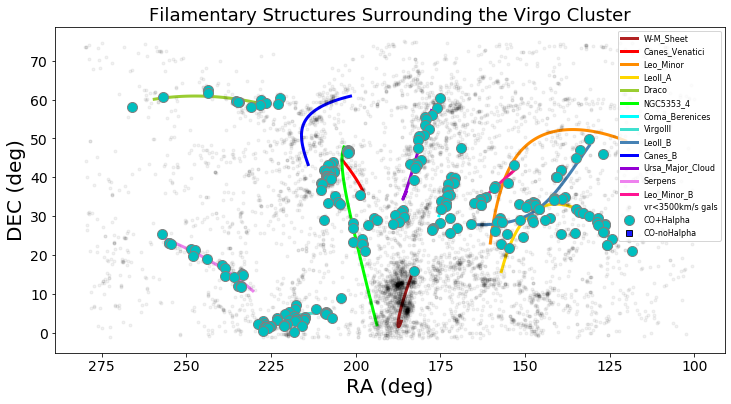

In [265]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=0.05,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
print(v.main['VFID_V1'][flag])
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# Halpha sources
flag =  v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'r^',alpha=.2,markersize=6,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)
#
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)
plt.savefig(homedir+'/research/Virgo/plots/co-halpha-positions.png')

number of CO with Halpha =  227
number of CO without Halpha =  15
number of CO without Halpha =  631


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

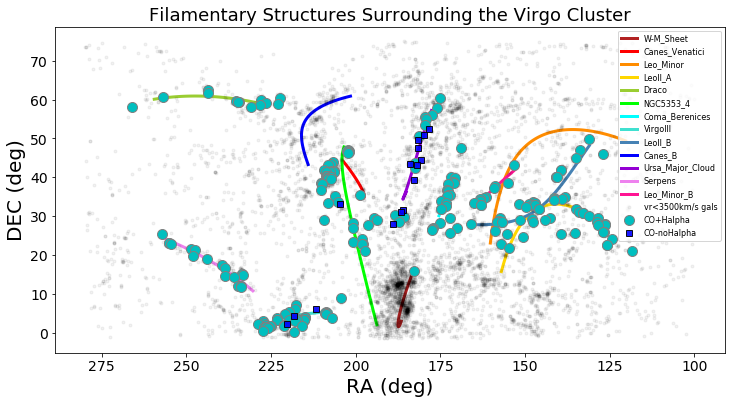

In [198]:
# after night 2


plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=0.05,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# Halpha sources
flag =  v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
#plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'r^',alpha=.2,markersize=6,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)
#
# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# Observing Planning

In [14]:
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py


number of CO sources that still need observing = 27
27
after removing targets from bok mar run:  26
after removing targets from bok apr run:  26
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  26
after cutting table to keep remaining targets:  26
after sorting arrays by RA:  26


<Figure size 432x288 with 0 Axes>

In [15]:
airmass_plotsv2(pointing_id,ING=True)

plotting airmass curves for INT
4
plot 1 of 4
plot 2 of 4
plot 3 of 4
plot 4 of 4


# Finding Charts for All Targets

In [10]:

def plotone(vfid):
    os.chdir(homedir+'/research/Virgo/finding-charts/2022May/')
    i = vfdict[vfid]
    platinum_finding_chart(i,ING=True,BOK=False)
    

In [45]:
# when looking for extra targets at the end of the night
# set extraTargets = True at beginning of program
 

vfid = 'VFID4037'
plotone(vfid)

number of CO sources that still need observing = 72
72
after removing targets from bok mar run:  72
after removing targets from bok apr run:  72
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  72
after cutting table to keep remaining targets:  72
after sorting arrays by RA:  72
######################
adding footprint of WFC
pointin center coords =  234.07630783333332 16.586275466666667
i=24, pointing VFID4037, vr=1031.4, ngal = 6


<Figure size 432x288 with 0 Axes>

number of CO sources that still need observing = 27
27
after removing targets from bok mar run:  26
after removing targets from bok apr run:  26
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  26
after cutting table to keep remaining targets:  26
after sorting arrays by RA:  26
######################
adding footprint of WFC
pointin center coords =  181.5047595 47.4784538
i=9, pointing VFID1534, vr=563.7, ngal = 1


<Figure size 432x288 with 0 Axes>

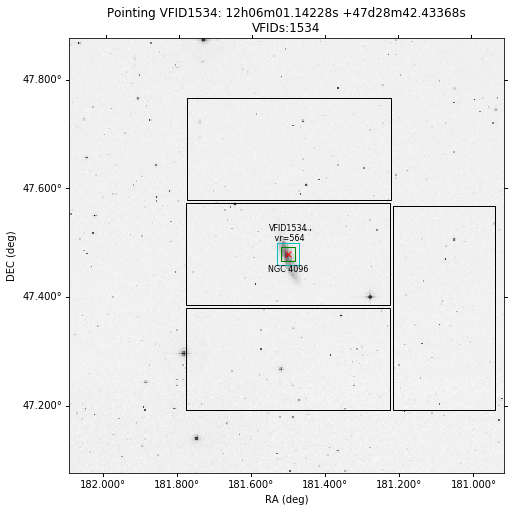

In [125]:
# night 2 targets
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
#vfid = "VFID0957"

vfid="VFID1534"
#vfid = "VFID2171"
#vfid = "VFID2883"
#vfid = "VFID6620"
#vfid = "VFID1010"
#vfid = "VFID6293"
plotone(vfid)


number of CO sources that still need observing = 6
6
after removing targets from bok mar run:  6
after removing targets from bok apr run:  6
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  6
after cutting table to keep remaining targets:  6
after sorting arrays by RA:  6
VFID_V1 
--------
VFID4797
VFID5897
VFID5193
VFID4145
VFID4086
VFID4701
######################
adding footprint of WFC
pointin center coords =  230.2478055 12.1814928
i=0, pointing VFID4797, vr=1166.9, ngal = 1
######################
adding footprint of WFC
pointin center coords =  230.485344 5.0706315
i=1, pointing VFID5897, vr=1439.8, ngal = 1
######################
adding footprint of WFC
pointin center coords =  231.9352815 9.6991417
i=2, pointing VFID5193, vr=1819.9, ngal = 2
######################
adding footprint of WFC
pointin center coords =  232.912758 15.591612
i=3, pointing VFID4145, vr=1767.2, ngal = 2
######################
adding footprint of WFC
pointin center coords = 

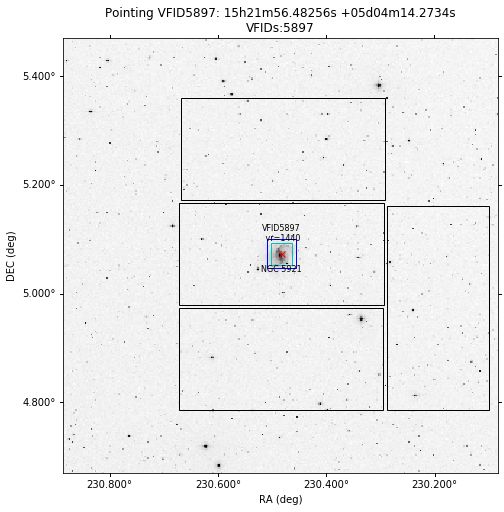

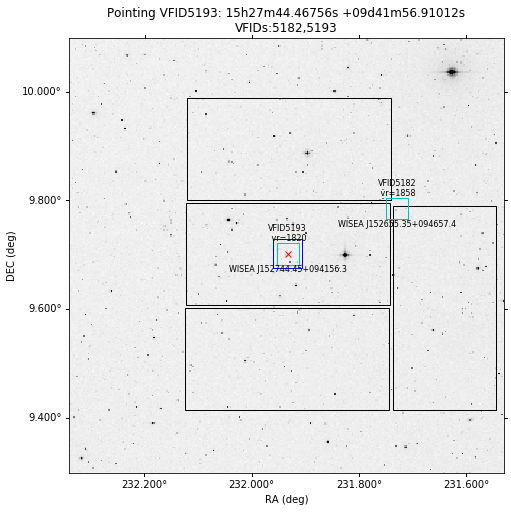

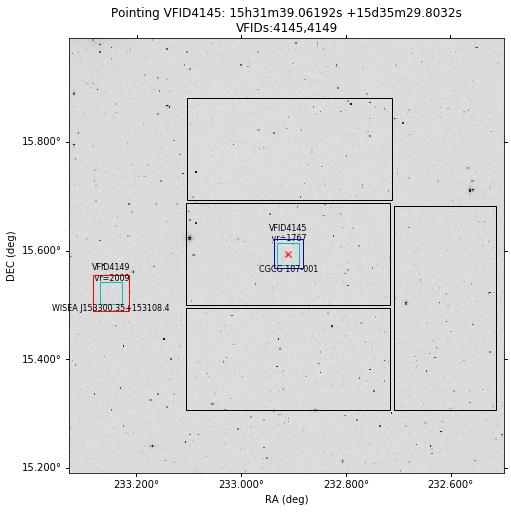

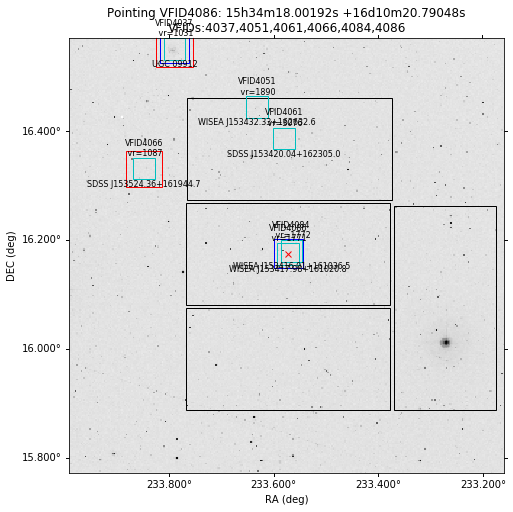

In [169]:
# when looking for extra targets at the end of the night
# set extraTargets = True at beginning of program
 
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
#flag = (v.main['RA'] > 230) & (v.env['filament_member'])
#print('number of targets = {}'.format(sum(flag)))
print(pointing_id)
for vfid in pointing_id:
    plotone(vfid)

plotting airmass curves for INT
1
plot 1 of 1


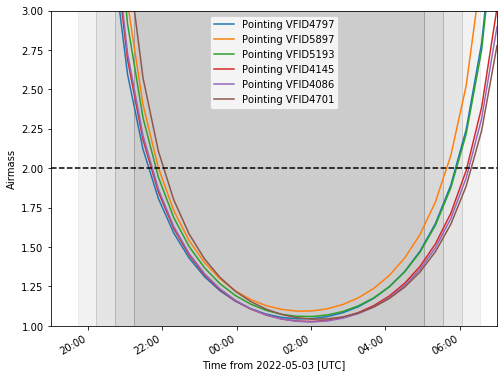

In [170]:
airmass_plotsv2(pointing_id,ING=True)

# Night 2 Planning

In [151]:
 
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
vfid = 'VFID4093'
plotone(vfid)

number of CO sources that still need observing = 72
72
after removing targets from bok mar run:  72
after removing targets from bok apr run:  72
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  72
after cutting table to keep remaining targets:  72
after sorting arrays by RA:  72


KeyError: 'VFID4093'

<Figure size 432x288 with 0 Axes>

number of CO sources that still need observing = 20
20
after removing targets from bok mar run:  19
after removing targets from bok apr run:  19
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  19
after cutting table to keep remaining targets:  19
after sorting arrays by RA:  19
######################
adding footprint of WFC
pointin center coords =  178.28755783333335 52.3266874
i=1, pointing VFID1213, vr=1051.0, ngal = 3


<Figure size 432x288 with 0 Axes>

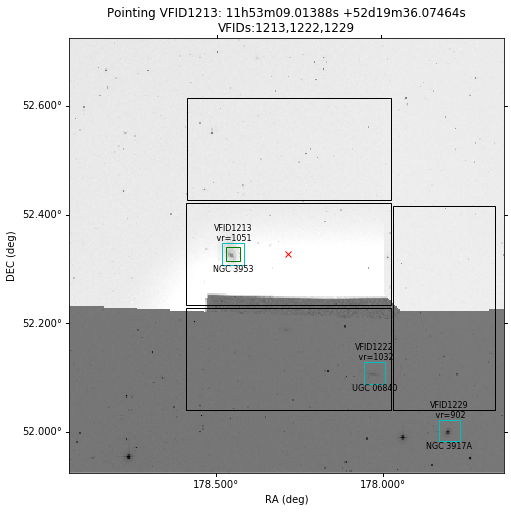

In [194]:
# night 3 targets
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

vfid = "VFID1213"
#vfid = "VFID1277"
#vfid = "VFID1376"
#vfid = "VFID1819"
#vfid = "VFID3098"
#vfid = "VFID5981"



plotone(vfid)


# Night 3 Planning

* make sure extraTargets = False to start
* then set to True when looking for extra targets for the end of the night



In [228]:

%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
myflag = v.main['COflag'] & ~v.main['HAobsflag']
print('number still to observe = {}'.format(np.sum(myflag)))
#print(v.main['VFID_V1'][myflag])
myflag = v.main['COflag'] & ~v.main['HAobsflag'] & (v.main['vr'] < 2000)
print('number still to observe = {}'.format(np.sum(myflag)))

print(v.main['VFID_V1'][myflag])

number of CO sources that still need observing = 12
12
after removing targets from bok mar run:  11
after removing targets from bok apr run:  11
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  11
after cutting table to keep remaining targets:  11
after sorting arrays by RA:  11
number still to observe = 13
number still to observe = 12
VFID_V1 
--------
VFID1213
VFID1277
VFID1376
VFID1756
VFID1819
VFID1855
VFID2797
VFID2821
VFID3098
VFID5726
VFID5981
VFID6305


In [220]:
# night 3 targets
# DONE
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

#vfid = "VFID1213"
vfid = "VFID1277"
#vfid = "VFID1376"
#vfid = "VFID1819"
#vfid = "VFID3098"
#vfid = "VFID5981"


plotone(vfid)

number of CO sources that still need observing = 14
14
after removing targets from bok mar run:  13
after removing targets from bok apr run:  13
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  13
after cutting table to keep remaining targets:  13
after sorting arrays by RA:  13
######################
adding footprint of WFC
pointin center coords =  179.85459 50.9116836
i=1, pointing VFID1277, vr=970.2, ngal = 3


number of CO sources that still need observing = 14
14
after removing targets from bok mar run:  13
after removing targets from bok apr run:  13
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  13
after cutting table to keep remaining targets:  13
after sorting arrays by RA:  13
plotting airmass curves for INT
2
plot 1 of 2
plot 2 of 2


<Figure size 432x288 with 0 Axes>

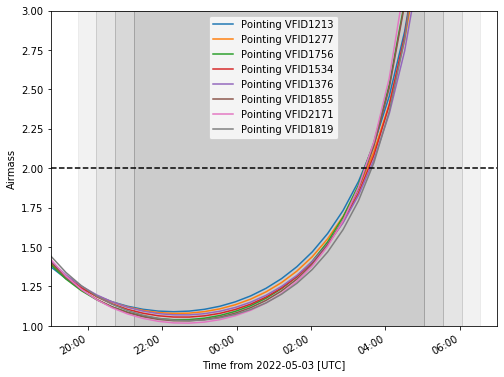

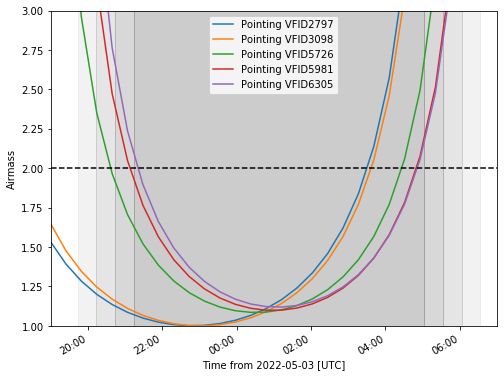

In [217]:

%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
airmass_plotsv2(pointing_id,ING=True)

## Night 3 Extra Targets

* running this after updating the list of observed targets


In [209]:

# changed extraTargets to True
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py


number of CO sources that still need observing = 11
11
after removing targets from bok mar run:  11
after removing targets from bok apr run:  11
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  11
after cutting table to keep remaining targets:  11
after sorting arrays by RA:  11


<Figure size 432x288 with 0 Axes>

######################
adding footprint of WFC
pointin center coords =  224.536632 6.7465882
i=0, pointing VFID5631, vr=1665.6, ngal = 2
######################
adding footprint of WFC
pointin center coords =  224.65771949999998 6.7751498
i=1, pointing VFID5625, vr=1675.7, ngal = 2
######################
adding footprint of WFC
pointin center coords =  224.69200800000002 2.9689931
i=2, pointing VFID6183, vr=1650.3, ngal = 1
######################
adding footprint of WFC
pointin center coords =  225.98308949999998 0.4292245
i=3, pointing VFID6607, vr=1591.5, ngal = 1
######################
adding footprint of WFC
pointin center coords =  228.1875 6.1641673
i=4, pointing VFID5702, vr=1487.0, ngal = 1
######################
adding footprint of WFC
pointin center coords =  229.94958300000002 3.9780556
i=5, pointing VFID6038, vr=1712.2, ngal = 1
######################
adding footprint of WFC
pointin center coords =  230.2478055 12.1814928
i=6, pointing VFID4797, vr=1166.9, ngal = 1
#########

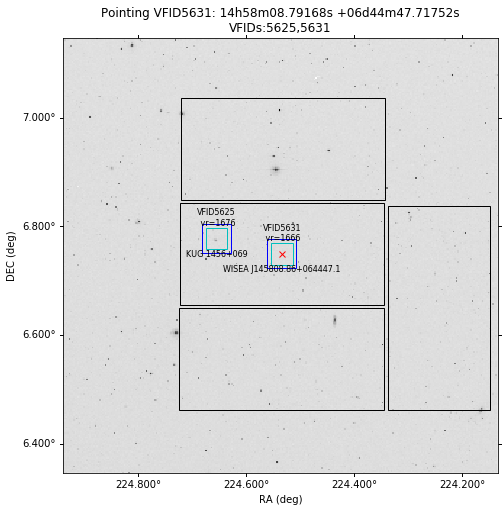

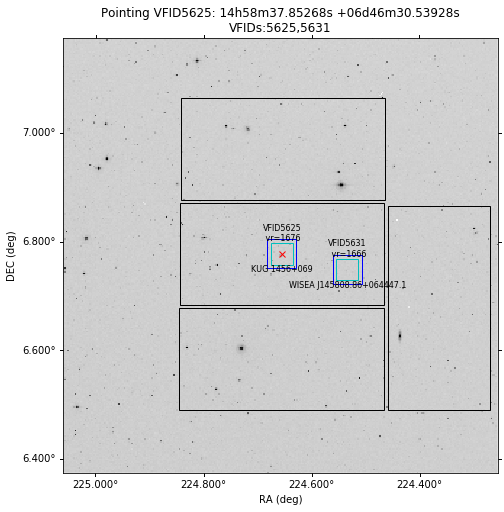

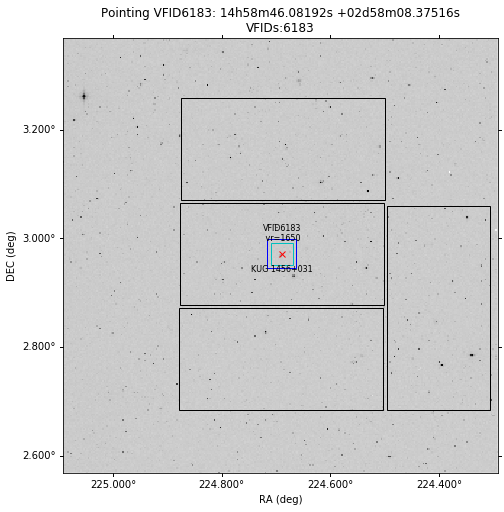

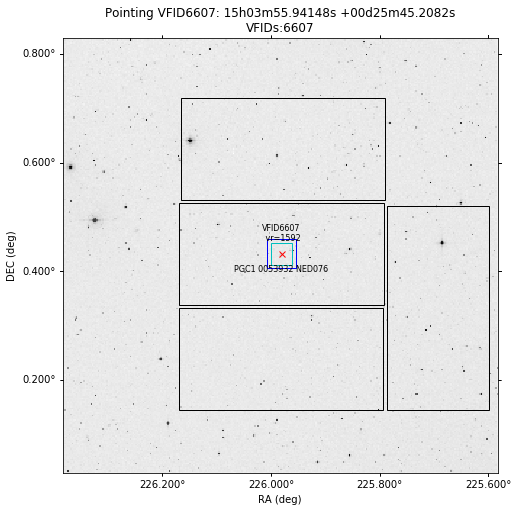

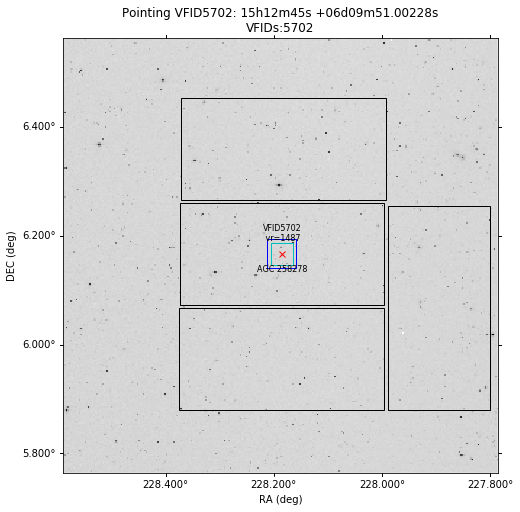

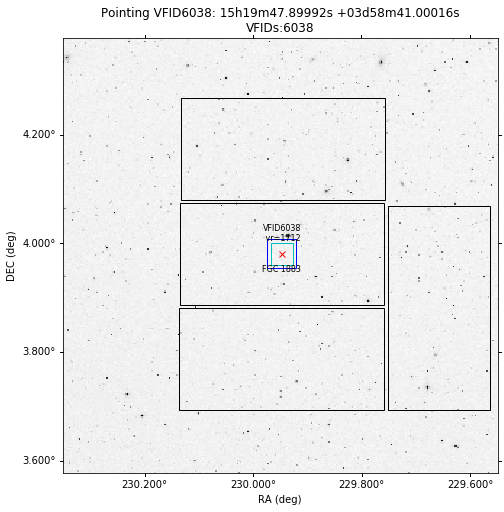

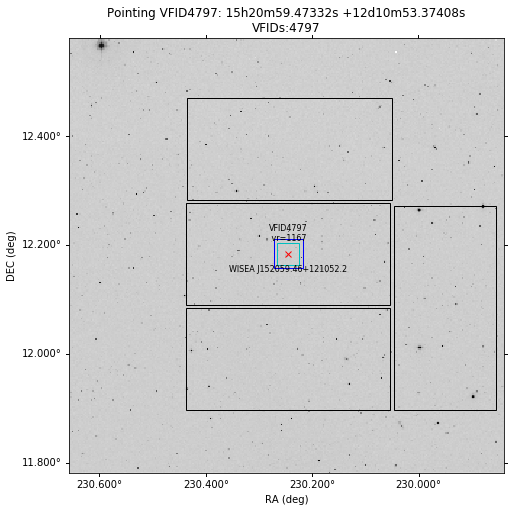

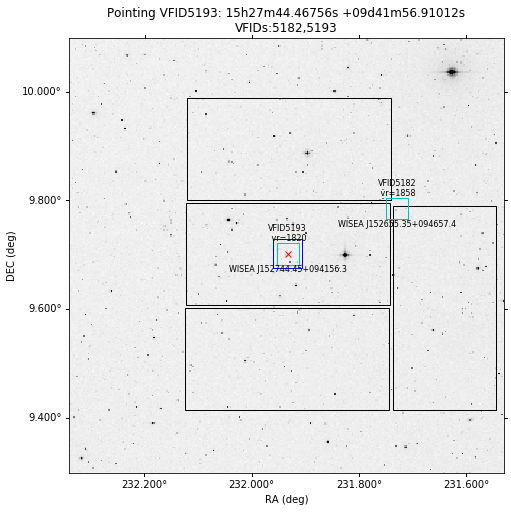

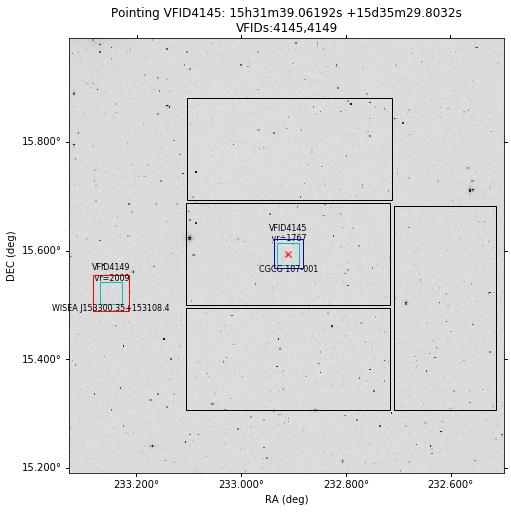

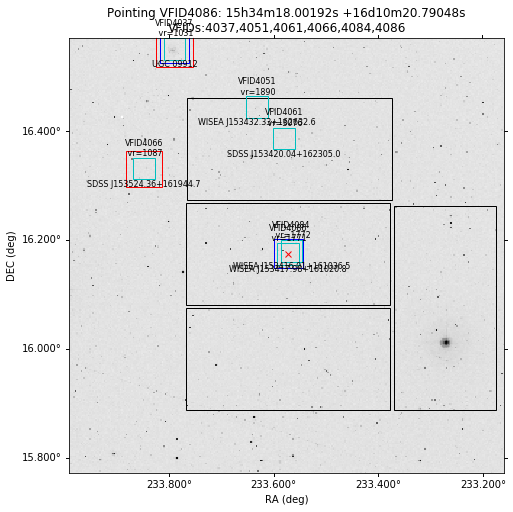

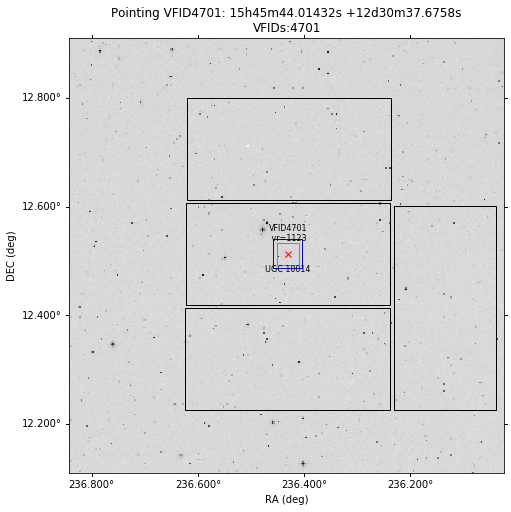

In [210]:
# running all
  
for vfid in pointing_id:
    plotone(vfid)

plotting airmass curves for INT
2
plot 1 of 2
plot 2 of 2


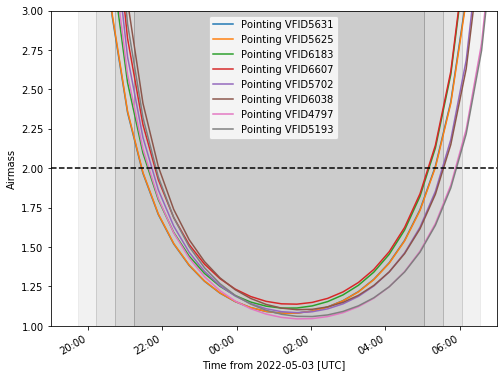

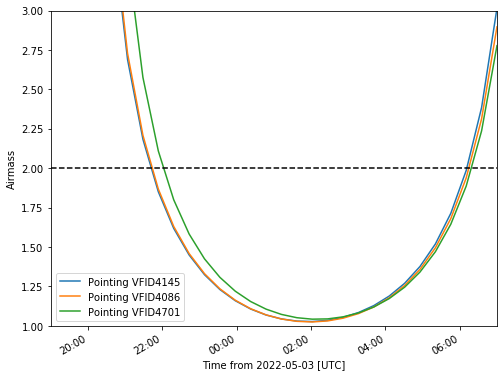

In [211]:
airmass_plotsv2(pointing_id,ING=True)

number of CO sources that still need observing = 11
11
after removing targets from bok mar run:  11
after removing targets from bok apr run:  11
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  11
after cutting table to keep remaining targets:  11
after sorting arrays by RA:  11
######################
adding footprint of WFC
pointin center coords =  233.70834133333332 16.3724418
i=9, pointing VFID4086, vr=1771.0, ngal = 6


<Figure size 432x288 with 0 Axes>

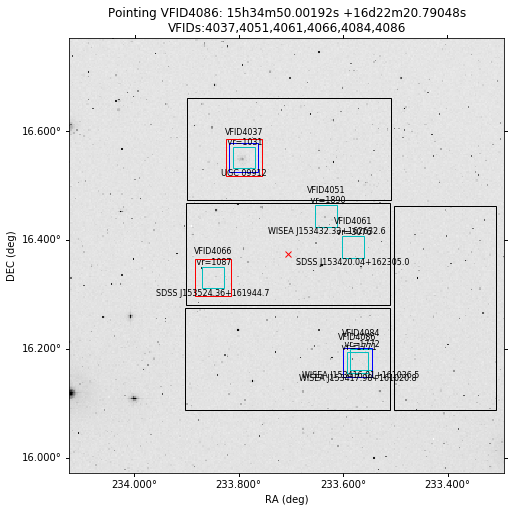

In [216]:

# night 3 extra targets

%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

#vfid = "VFID5625"
vfid = "VFID4086"

plotone(vfid)

# Night 4

number of CO sources that still need observing = 13
13
after removing targets from bok mar run:  12
after removing targets from bok apr run:  12
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  12
after cutting table to keep remaining targets:  12
after sorting arrays by RA:  12
VFID_V1 
--------
VFID1213
VFID1277
VFID1756
VFID1376
VFID1855
VFID1819
VFID2797
VFID3025
VFID3098
VFID5726
VFID5981
VFID6305
######################
adding footprint of WFC
pointin center coords =  187.0643985 28.753648533333333
i=7, pointing VFID3025, vr=682.2, ngal = 3


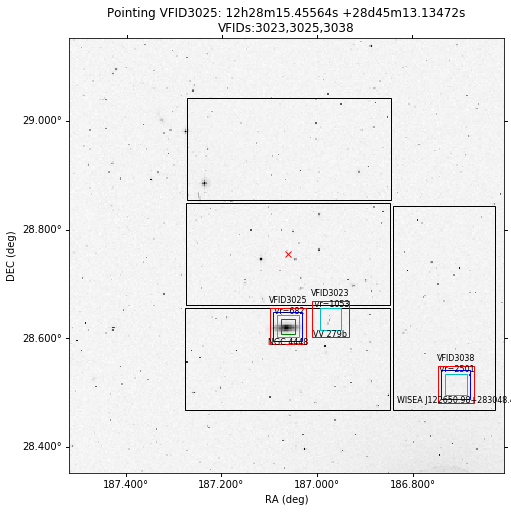

In [246]:
# night 3 targets
# DONE
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
print(pointing_id)
#vfid = "VFID1756"
#vfid = "VFID1855"
#vfid = "VFID2797"
#vfid = "VFID2821" # observed at Bok in Mar 2021
#vfid = "VFID5726"
#vfid = "VFID6305"
vfid = "VFID3025"

plotone(vfid)

plotting airmass curves for INT
2
plot 1 of 2
plot 2 of 2


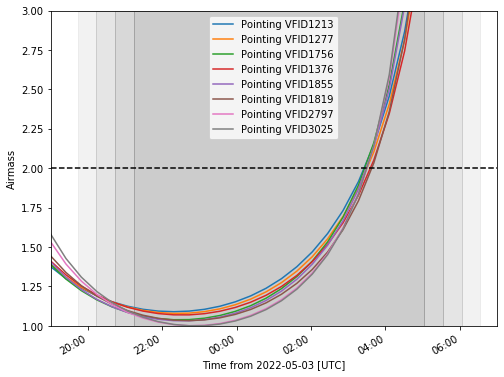

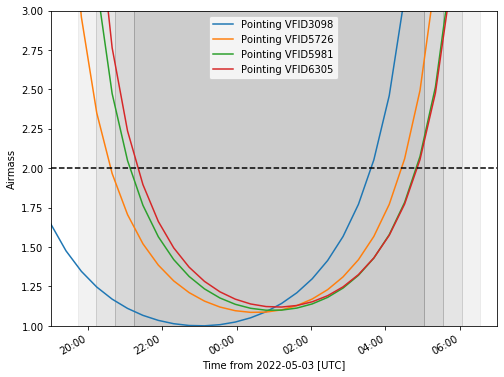

In [244]:
airmass_plotsv2(pointing_id,ING=True)

number of CO sources that still need observing = 12
12
after removing targets from bok mar run:  12
after removing targets from bok apr run:  12
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  12
after cutting table to keep remaining targets:  12
after sorting arrays by RA:  12
######################
adding footprint of WFC
pointin center coords =  231.9852815 9.749141700000001
i=8, pointing VFID5193, vr=1819.9, ngal = 2


<Figure size 432x288 with 0 Axes>

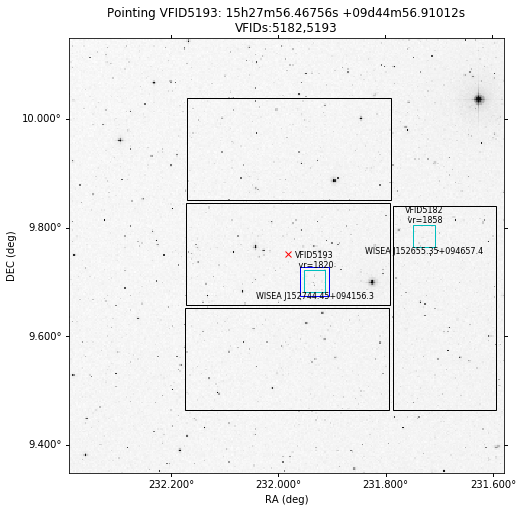

In [255]:

# night 4 extra targets

%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

vfid = "VFID6183"
vfid = "VFID5193"
plotone(vfid)

# Night 5


* we have finished the CO targets
* selecting filament members with HI for some additional imaging
* decent amount of clouds, so this might not be the best data!

In [266]:

%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

number of CO sources that still need observing = 291
291
after removing targets from bok mar run:  291
after removing targets from bok apr run:  291
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  291
after cutting table to keep remaining targets:  291
after sorting arrays by RA:  291


<Figure size 432x288 with 0 Axes>

(array([19., 20., 12., 10.,  5.,  6.,  6.,  4.,  4.,  2.,  2.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 8.        ,  8.21052632,  8.42105263,  8.63157895,  8.84210526,
         9.05263158,  9.26315789,  9.47368421,  9.68421053,  9.89473684,
        10.10526316, 10.31578947, 10.52631579, 10.73684211, 10.94736842,
        11.15789474, 11.36842105, 11.57894737, 11.78947368, 12.        ]),
 <a list of 19 Patch objects>)

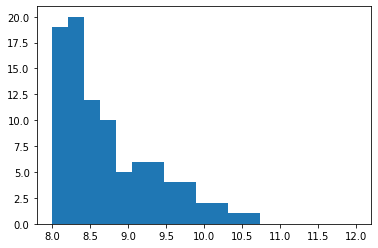

In [269]:
plt.hist(np.log10(v.nsav0['MASS'][need_obs]),bins=np.linspace(8,12,20))

In [293]:
# adding cut for NSA logMstar > 8.75
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py

number of CO sources that still need observing = 21
21
after removing targets from bok mar run:  21
after removing targets from bok apr run:  21
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  21
after cutting table to keep remaining targets:  21
after sorting arrays by RA:  21


<Figure size 432x288 with 0 Axes>

######################
adding footprint of WFC
pointin center coords =  173.9582115 35.3352489
i=0, pointing VFID2492, vr=1610.5, ngal = 1
######################
adding footprint of WFC
pointin center coords =  174.50889 35.2036374
i=1, pointing VFID2504, vr=1624.0, ngal = 1
######################
adding footprint of WFC
pointin center coords =  176.4039495 31.2995704
i=2, pointing VFID2814, vr=1789.9, ngal = 1
######################
adding footprint of WFC
pointin center coords =  176.60837850000001 34.8523467
i=3, pointing VFID2539, vr=1412.4, ngal = 1
######################
adding footprint of WFC
pointin center coords =  179.7363345 30.4123519
i=4, pointing VFID2875, vr=756.8, ngal = 2
######################
adding footprint of WFC
pointin center coords =  181.0159845 31.8958247
i=5, pointing VFID2767, vr=762.7, ngal = 1
######################
adding footprint of WFC
pointin center coords =  181.046763 18.4438225
i=6, pointing VFID3823, vr=930.9, ngal = 2
######################
add

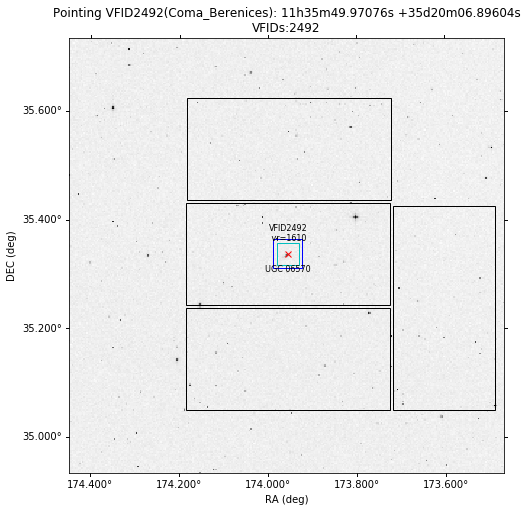

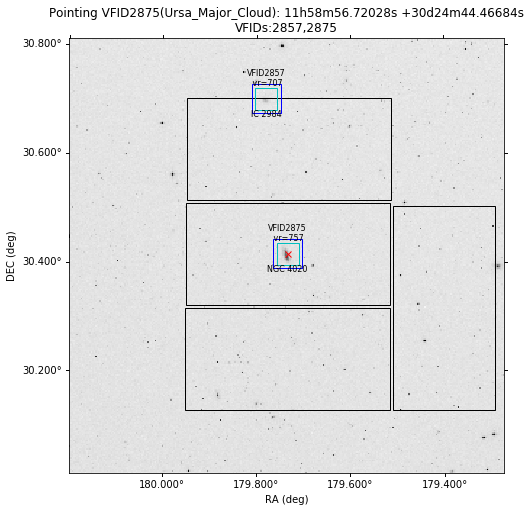

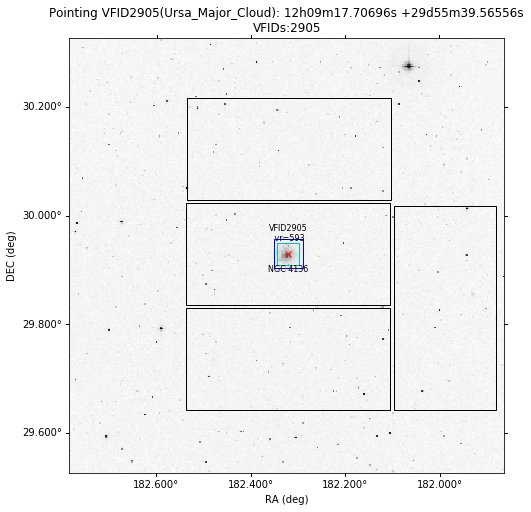

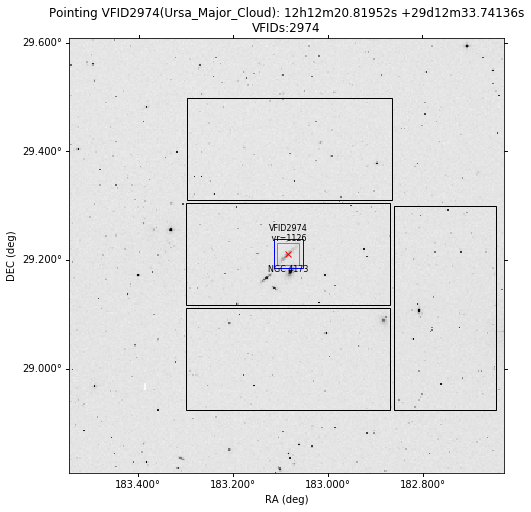

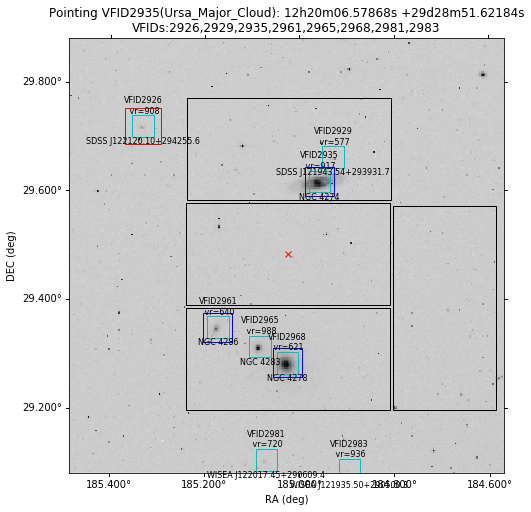

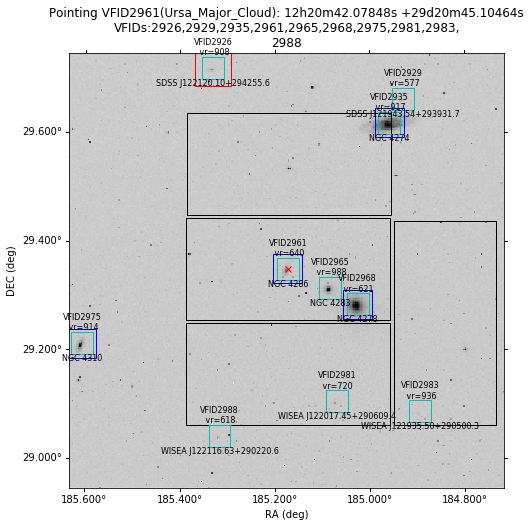

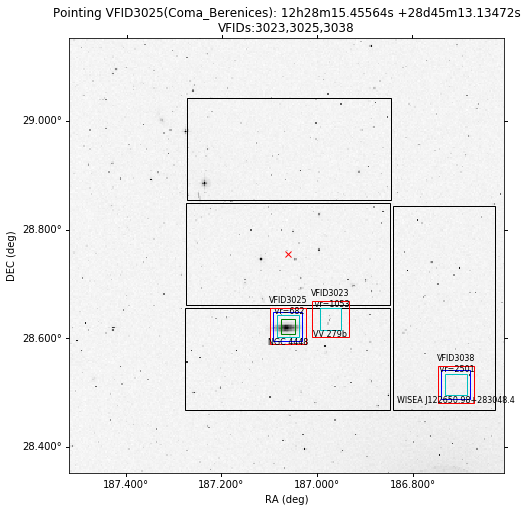

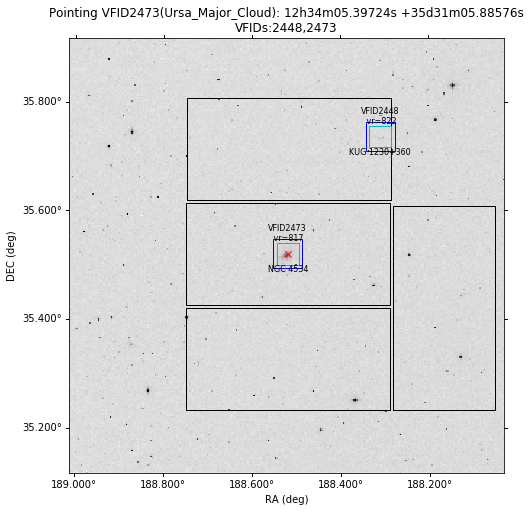

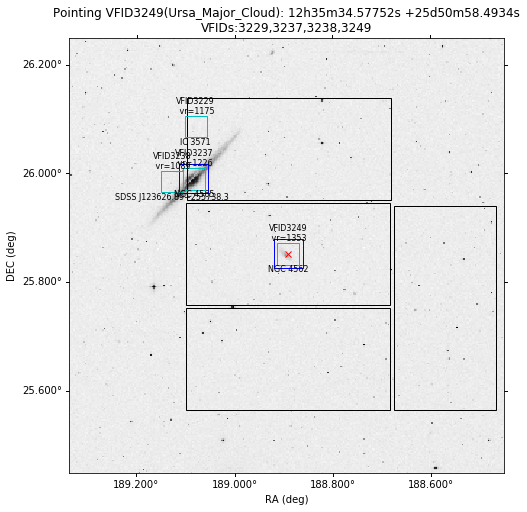

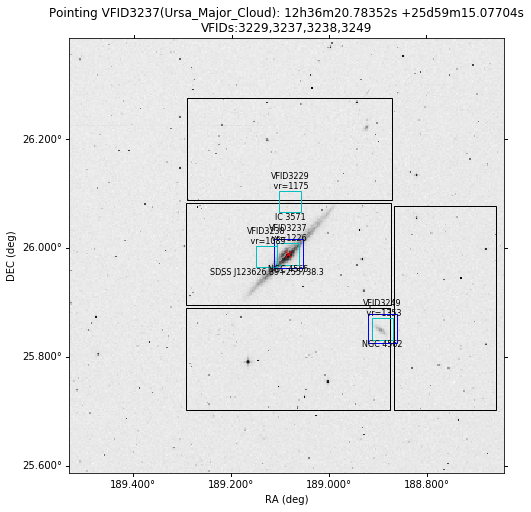

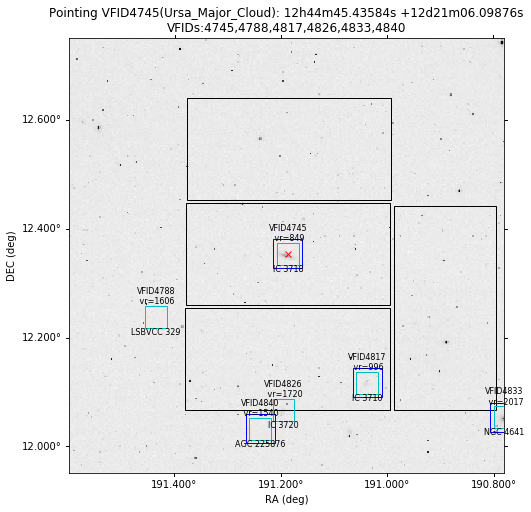

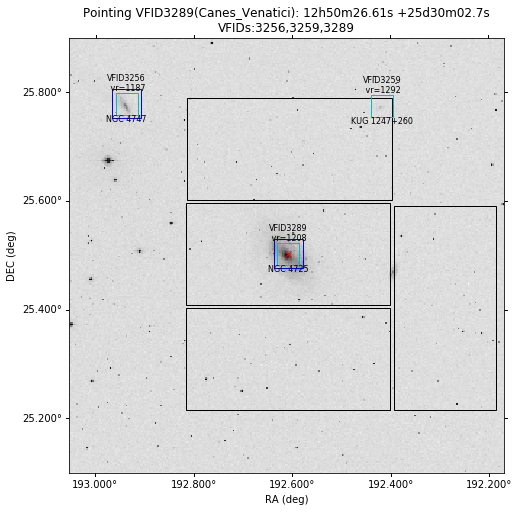

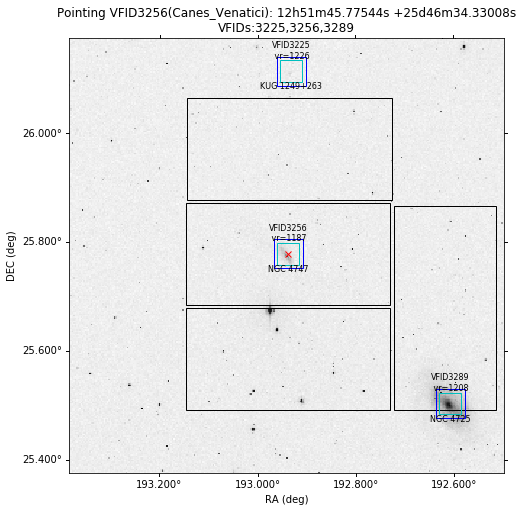

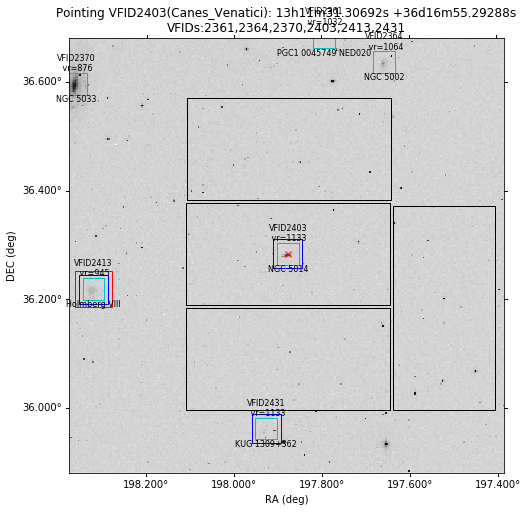

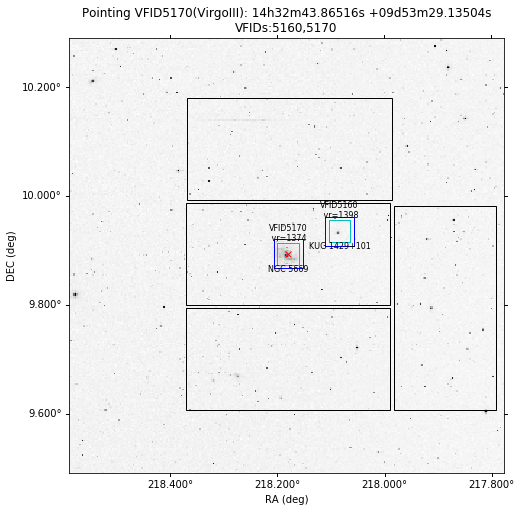

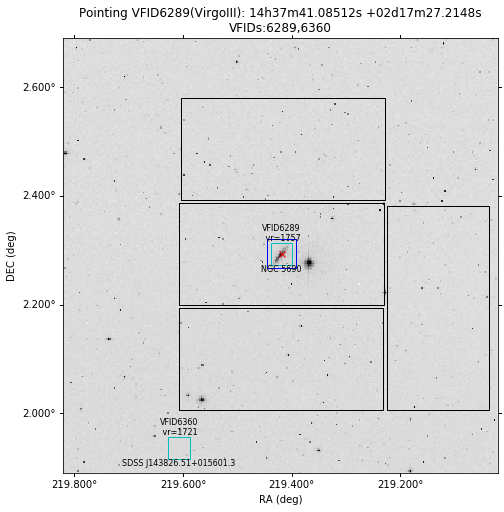

In [294]:
# running all
# I am probably going to go for targets with multiple galaxies in FOV
  
for vfid in pointing_id:
    plotone(vfid)

In [ ]:
airmass_plotsv2(pointing_id,ING=True)

In [289]:
# print out filament name
indices = np.arange(len(v.main))[need_obs]
for i in indices:
    print(v.main['VFID_V1'][i],v.env['filament'][i])

VFID2403 Canes_Venatici
VFID2473 Ursa_Major_Cloud
VFID2492 Coma_Berenices
VFID2504 Coma_Berenices
VFID2539 Coma_Berenices
VFID2767 Ursa_Major_Cloud
VFID2814 Coma_Berenices
VFID2875 Ursa_Major_Cloud
VFID2905 Ursa_Major_Cloud
VFID2935 Ursa_Major_Cloud
VFID2961 Ursa_Major_Cloud
VFID2974 Ursa_Major_Cloud
VFID3025 Coma_Berenices
VFID3237 Ursa_Major_Cloud
VFID3249 Ursa_Major_Cloud
VFID3256 Canes_Venatici
VFID3289 Canes_Venatici
VFID3823 Ursa_Major_Cloud
VFID3825 W-M_Sheet
VFID3932 W-M_Sheet
VFID4058 W-M_Sheet
VFID4517 W-M_Sheet
VFID4745 Ursa_Major_Cloud
VFID5170 VirgoIII
VFID5252 W-M_Sheet
VFID5446 W-M_Sheet
VFID5480 W-M_Sheet
VFID5588 W-M_Sheet
VFID5869 W-M_Sheet
VFID5894 W-M_Sheet
VFID5966 W-M_Sheet
VFID6286 W-M_Sheet
VFID6289 VirgoIII
VFID6470 W-M_Sheet
VFID6481 W-M_Sheet


number of CO sources that still need observing = 21
21
after removing targets from bok mar run:  21
after removing targets from bok apr run:  21
after removing galaxies that were in FOV of main targets from bok Apr 2022 runs:  21
after cutting table to keep remaining targets:  21
after sorting arrays by RA:  21
VFID_V1 
--------
VFID2492
VFID2504
VFID2814
VFID2539
VFID2875
VFID2767
VFID3823
VFID2905
VFID2974
VFID2935
VFID2961
VFID3025
VFID2473
VFID3249
VFID3237
VFID4745
VFID3289
VFID3256
VFID2403
VFID5170
VFID6289
######################
adding footprint of WFC
pointin center coords =  191.08931600000003 12.285027433333333
i=15, pointing VFID4745, vr=848.9, ngal = 8


<Figure size 432x288 with 0 Axes>

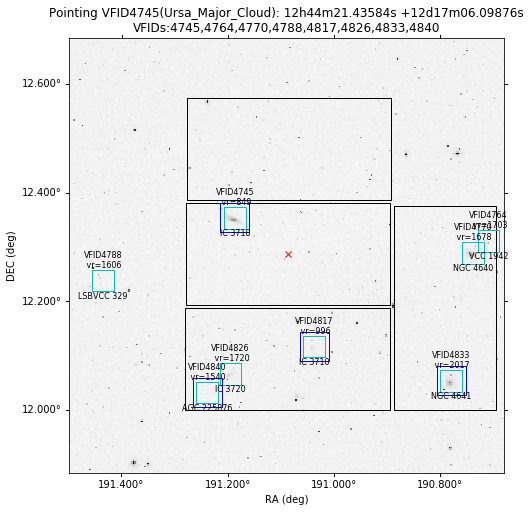

In [309]:
# night 5 targets
# DONE
%run ~/github/Virgo/programs/observing-halpha-v2catalogs.py
print(pointing_id)
#vfid = "VFID1756"
#vfid = "VFID1855"
#vfid = "VFID2797"
#vfid = "VFID2821" # observed at Bok in Mar 2021
#vfid = "VFID5726"
#vfid = "VFID6305"
vfid = "VFID2935"
vfid = "VFID5966"
vfid = "VFID3237"
vfid = "VFID4745"
plotone(vfid)

# Playing around...

In [22]:
plotdir = homedir+'/research/Virgo/plots/'
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

<Figure size 432x288 with 0 Axes>

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  3.,  2.,  5.,  1.,  8., 16., 12., 15.,
        17., 13., 13., 13., 16., 17., 16., 23., 16., 11., 10.,  2.,  4.,
         4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 6.        ,  6.12244898,  6.24489796,  6.36734694,  6.48979592,
         6.6122449 ,  6.73469388,  6.85714286,  6.97959184,  7.10204082,
         7.2244898 ,  7.34693878,  7.46938776,  7.59183673,  7.71428571,
         7.83673469,  7.95918367,  8.08163265,  8.20408163,  8.32653061,
         8.44897959,  8.57142857,  8.69387755,  8.81632653,  8.93877551,
         9.06122449,  9.18367347,  9.30612245,  9.42857143,  9.55102041,
         9.67346939,  9.79591837,  9.91836735, 10.04081633, 10.16326531,
        10.28571429, 10.40816327, 10.53061224, 10.65306122, 10.7755102 ,
        10.89795918, 11.02040816, 11.14285714, 11.26530612, 11.3877551 ,
        11.51020408, 11.63265306, 11.75510204, 11.87755102, 12. 

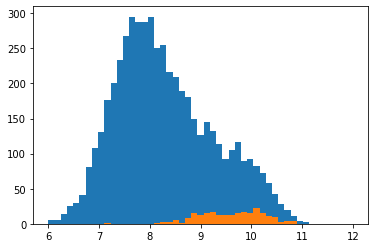

In [33]:
flag = v.main['COflag']
plt.figure()
plt.hist(np.log10(v.nsav0['MASS']),bins=np.linspace(6,12,50))
plt.hist(np.log10(v.nsav0['MASS'][flag]),bins=np.linspace(6,12,50))


In [38]:
v.env


<Table length=6780>
  VFID           DM         ... mem_Mould00     sep_degree    
 bytes8       float64       ...     bool         float64      
-------- ------------------ ... ----------- ------------------
VFID0000 31.941844830063214 ...       False 62.570119372065726
VFID0001 30.824492927707986 ...       False  62.58939048635605
VFID0002  33.08861233285418 ...       False  66.58444470534114
VFID0003 32.377721425989066 ...       False  62.45929044800913
VFID0004 32.229043216376944 ...       False  62.47768115452717
VFID0005  32.36852023075264 ...       False 62.775312807551586
VFID0006  32.87852023075263 ...       False  71.74274616620686
VFID0007  32.79468989279763 ...       False  72.66725038218098
VFID0008 31.558336347639848 ...       False  77.32666035214108
VFID0009  32.23852023075263 ...       False  62.15697672629366
     ...                ... ...         ...                ...
VFID6787  33.03514943416933 ...       False 13.947598240884519
VFID6788  32.13568424520141 ...       False  30.87946486400528
VFID6789  30.11022417087051 ...       False 27.896823147356102
VFID6790  32.98320181866121 ...       False 14.173118463855719
VFID6791  32.39206283555651 ...       False 13.689870461738021
VFID6792  32.13717279753957 ...       False  17.98315666007754
VFID6793  32.94145915663532 ...       False  22.21380738204898
VFID6794  32.72489674354175 ...       False 14.334659941040178
VFID6795  32.60262611182187 ...       False  13.68831201077337
VFID6796 31.008336347639847 ...       False   15.5413692055003

In [57]:
# select serpens filament members

flag =   & (v.main['A100flag']) & ~v.main['HAobsflag']
print(sum(flag ))


17


In [58]:
np.log10(v.nsav0['MASS'][flag])

<Column name='MASS' dtype='float32' length=17>
 8.144292
     -inf
10.210028
 8.254037
     -inf
 8.036344
 7.125544
 7.948159
 8.003889
     -inf
 8.466356
 8.046806
6.9855566
 7.972495
 7.013074
     -inf
10.590287

In [59]:
v.main['NEDname'][flag],v.main['RA'][flag]

(<MaskedColumn name='NEDname' dtype='bytes30' length=17>
            MCG +03-40-008
           HIPASS J1548+16
                  NGC 5962
                 UGC 09912
                 UGC 10061
 WISEA J154739.20+161656.1
 WISEA J153417.98+161020.8
       PGC1 2801027 NED001
              CGCG 107-001
       PGC1 5059736 NED001
                 UGC 09951
                 UGC 10014
 WISEA J152059.46+121052.2
 WISEA J152744.45+094156.3
 WISEA J145808.86+064447.1
                AGC 258278
                  NGC 5921, <Column name='RA' dtype='float64' length=17>
         233.786823
         237.261609
            234.132
 233.79297449999999
        237.8114475
         236.913852
         233.575008
 244.18591049999998
         232.912758
         236.452362
        234.8334855
 236.43339300000002
        230.2478055
        231.9352815
         224.536632
           228.1875
         230.485344)

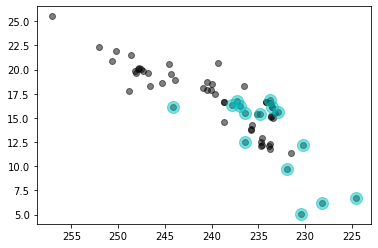

In [142]:

sflag =  (v.env['filament'] == 'Serpens') & v.env['filament_member']

flag =  sflag & (v.main['A100flag']) & ~v.main['HAobsflag']
plt.plot(v.main['RA'][sflag],v.main['DEC'][sflag],'ko',alpha=.5)
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',alpha=.5,markersize=12)
plt.gca().invert_xaxis()

In [140]:
plotdir = homedir+'/research/Virgo/plots/'
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtablesv2.py

<Figure size 432x288 with 0 Axes>

VFID3995 233.786823 16.8708549
VFID4016 237.261609 16.7136102
VFID4067 237.8114475 16.3279492
VFID4073 236.913852 16.2828518
VFID4086 233.575008 16.1724418
VFID4093 244.18591049999998 16.0858023
VFID4145 232.912758 15.591612
VFID4150 236.452362 15.5161511
VFID4165 234.8334855 15.3843629
VFID4701 236.43339300000002 12.5104655
VFID4797 230.2478055 12.1814928
VFID5193 231.9352815 9.6991417
VFID5631 224.536632 6.7465882
VFID5702 228.1875 6.1641673
VFID5897 230.485344 5.0706315


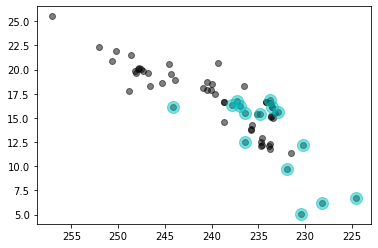

In [164]:
sflag =  (v.env['filament'] == 'Serpens') & v.env['filament_member']
flag =  sflag & (v.main['A100flag']) & ~v.main['HAobsflag']
flag2 =  sflag & (v.main['A100flag']) & v.main['HAobsflag'] & (v.main['vr'] < 2000)
plt.plot(v.main['RA'][sflag],v.main['DEC'][sflag],'ko',alpha=.5,label='Member')
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',alpha=.5,markersize=12,label='HI, no Halpha')
plt.gca().invert_xaxis()

findices = np.arange(len(v.main))[flag]
for i in findices:
    print(v.main['VFID_V1'][i],v.main['RA'][i],v.main['DEC'][i])
newtab = Table([v.main['VFID_V1'],v.main['RA'],v.main['DEC']],names=['name','RA','DEC'])
newtab[flag].write('serpens_targets.fits',format='fits',overwrite=True)

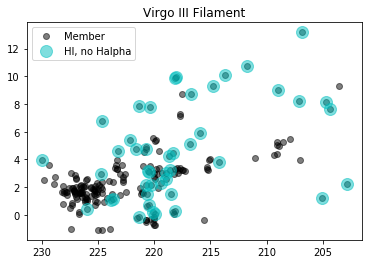

In [146]:
v3flag =  (v.env['filament'] == 'VirgoIII') & v.env['filament_member']
flag =  v3flag & (v.main['A100flag']) & ~v.main['HAobsflag']
plt.plot(v.main['RA'][v3flag],v.main['DEC'][v3flag],'ko',alpha=.5,label='Member')
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',alpha=.5,markersize=12,label='HI, no Halpha')
plt.gca().invert_xaxis()
plt.title('Virgo III Filament')
plt.legend()